# 3.9 Interpretacja działania drzewa

In [1]:
import pandas as pd

In [2]:
boston_df = pd.read_parquet("../data/boston_df.parquet")

In [3]:
import joblib

In [4]:
dt = joblib.load("../model/house_prices_dtree.joblib")

In [5]:
dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=8, random_state=462)

## Wizualizacja stworzonego procesu
Zobaczmy jak graficznie prezentuje się stworzone przez nas drzewo decyzyjne.

In [6]:
from sklearn.tree import plot_tree

In [7]:
import matplotlib.pyplot as plt

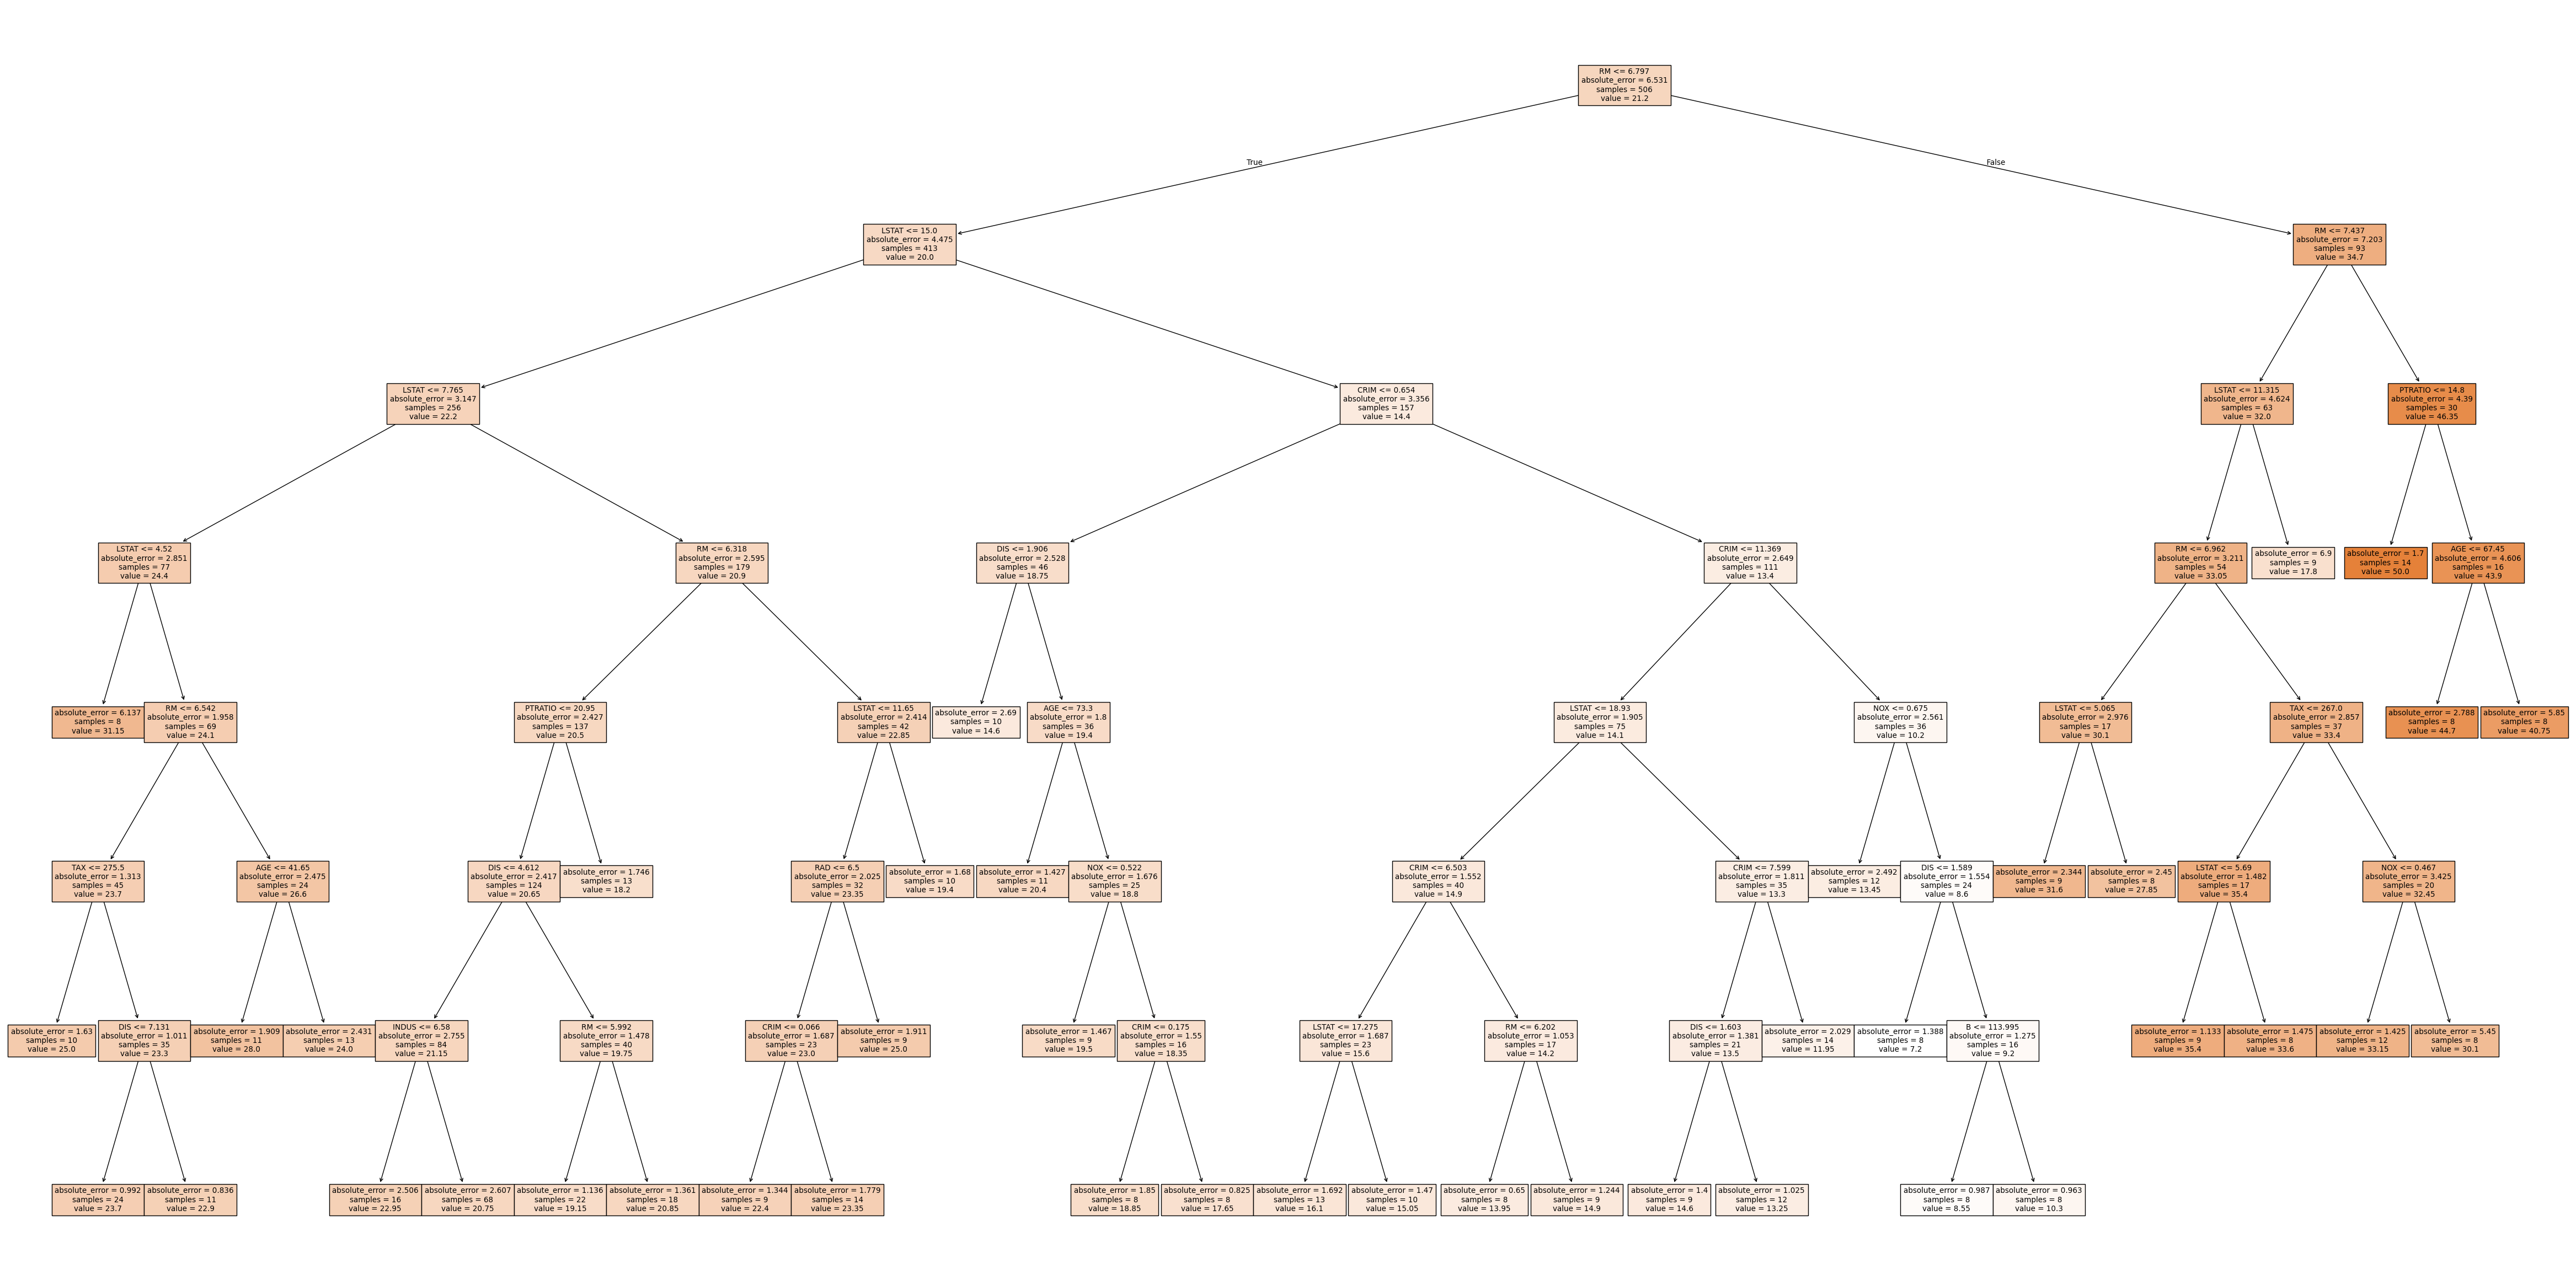

In [8]:
fig = plt.figure(figsize=(60, 30,))
plot_tree(dt, feature_names=boston_df.columns, filled=True)
plt.show()

Niestety głębokość drzewa jest dość duża i niektóre warunki zaczęły na siebie nachodzić. Warto więc prześledzić jak model ocenił ważność poszczególnych cech na wynik działania modelu.

<Axes: >

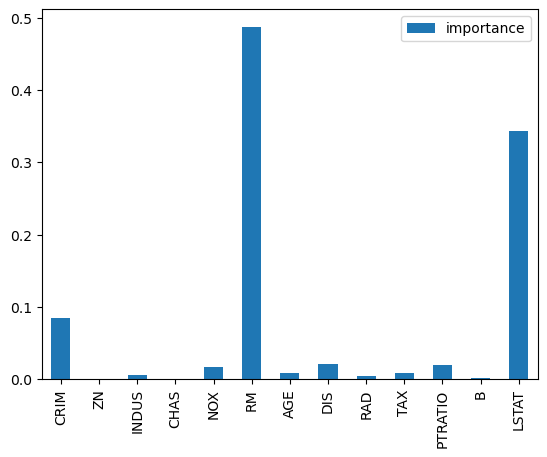

In [9]:
results_df = pd.DataFrame({
    "importance": dt.feature_importances_,
}, index=boston_df.drop(columns="MEDV").columns)
results_df.plot.bar()